## Introduction to the Brownian Motion and Stochastic Differential Equations

In this article we will explore simulation of Brownian Motions. Brownian Motion is a mathematical model used to simulate the behaviour of asset prices for the purposes of pricing options contracts.

We will simulate Brownian Motion paths using the Python programming language. It will begin by looking at Standard Brownian Motion, then will proceed to add more complexity to the Brownian Motion dynamics.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

For the reproducibility of the code we use the following:

In [2]:
rng = np.random.default_rng(42)

In [3]:
# Initially was 50
paths = 10
points = 1000

In [4]:
mu, sigma = 0.0, 1.0

Let us know create a matrix of random numbers with the shape of (paths, points) and then calculate the cumulative sum of each row. This will give us the random walk for each path.

In [5]:
Z = rng.normal(mu, sigma, (paths, points))

In [6]:
interval = [0.0, 1.0]
dt = (interval[1] - interval[0]) / (points - 1)

In [7]:
t_axis = np.linspace(interval[0], interval[1], points)

Now we create the 50 random realizations of the Brownian Motion we were looking for.

In the following, we are using the formula:
$$W\left(t_{i+1}\right)=W\left(t_i\right)+\sqrt{t_{i+1}-t_i} Z_{i+1},$$
where $(Z_{i})_{i}$ are normal distributions independent between each other.

In [8]:
W = np.zeros((paths, points))
for idx in range(1, points):
    W[:, idx] = W[:, idx - 1] + np.sqrt(dt) * Z[:, idx]

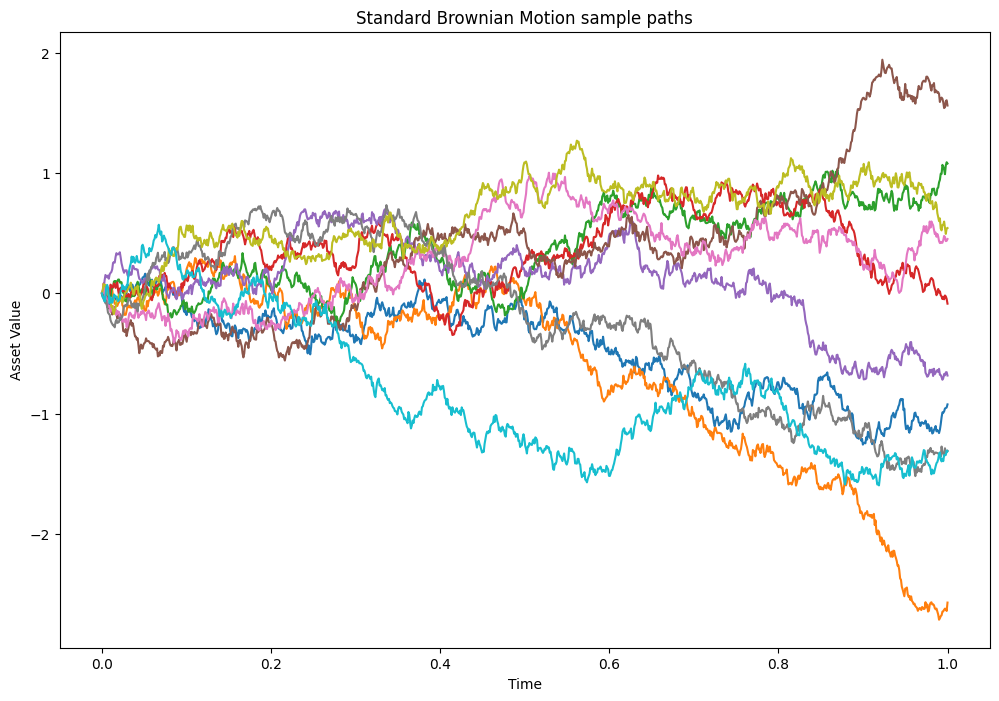

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for path in range(paths):
    ax.plot(t_axis, W[path, :])
ax.set_title("Standard Brownian Motion sample paths")
ax.set_xlabel("Time")
ax.set_ylabel("Asset Value")
plt.show()

### Constant Drift and Volatility Brownian Motion

The next recursion is a modification from the equation above to include an additional term $\mu\left(t_{i+1}-t_i\right)$ along with the multiplication of the final term by $\sigma$. This is what allows a non-zero mean, as well as a non-unit standard deviation:

$$
X\left(t_{i+1}\right)=X\left(t_i\right)+\mu\left(t_{i+1}-t_i\right)+\sigma \sqrt{t_{i+1}-t_i} Z_{i+1}
$$


Much of the code and calculated variables from the previous section can be completely re-used, including the (random seeded) standard normal draws matrix, Z. It is necessary to set the new drift mu_c and volatility sigma_c, which we have set to 5 and 2 respectively:

In [10]:
mu_c, sigma_c = 5.0, 2.0

In [11]:
X = np.zeros((paths, points))
for idx in range(points - 1):
    real_idx = idx + 1
    X[:, real_idx] = X[:, real_idx - 1] + mu_c * dt + sigma_c * np.sqrt(dt) * Z[:, idx]

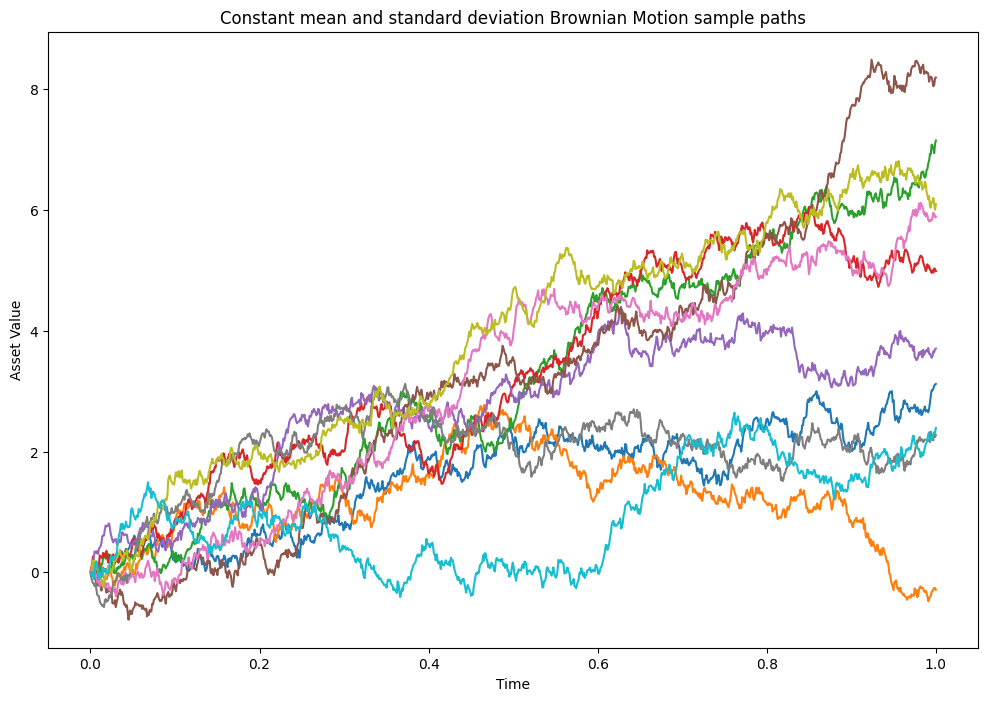

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for path in range(paths):
    ax.plot(t_axis, X[path, :])
ax.set_title("Constant mean and standard deviation Brownian Motion sample paths")
ax.set_xlabel("Time")
ax.set_ylabel("Asset Value")
plt.show()